In [ ]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

from datasets import load_dataset
pd.set_option('display.max_rows', 200)

dataset = load_dataset("amaydle/npc-dialogue")

In [ ]:
df = pd.concat([pd.DataFrame(dataset['train']), pd.DataFrame(dataset['test'])])
df.head()

,Name,Biography,Query,Response,Emotion
0,Bikram,Bikram is a rough and tough smuggler from the ...,What is your opinion on friendship?,Friendship is a bond stronger than blood.,Loyalty
1,Arcturus the Bounty Hunter,Arcturus is a fearless bounty hunter who has m...,What made you become a bounty hunter?,I believe in justice and making the world a sa...,Purpose
2,Elena Gilbert,Elena Gilbert is a teenage girl from the town ...,Can you tell me about Elena's role in Mystic F...,Elena is often caught in the middle.,Neutral
3,Arin the Cleric,Arin is a devoted follower of the god of light...,Have you ever faced a great challenge in your ...,"Yes, I've faced trials that tested my beliefs.",Determination
4,Scott McCall,Scott McCall is a teenage werewolf and the mai...,Can you tell me about your transformation?,"""Bitten, changed, became werewolf.""",Acceptance


In [ ]:
# Calculate the number of unique characters in the dataset
print('Character Names:', df['Name'].unique(), '\n')

print('Number of unique characters:', len(df['Name'].unique()))

Character Names: ['Bikram' 'Arcturus the Bounty Hunter' 'Elena Gilbert' 'Arin the Cleric'
 'Scott McCall' 'Indiana Jones' 'Garrick Stonefist' 'Thor'
 'Naruto Uzumaki' 'John Constantine' 'Barra the Brave'
 'Valtor the Fire Mage' 'Alistair the Enchanter' 'Eira' 'Hermione Granger'
 'Merlin' 'Elsa' 'Drogthar the Mighty' 'Bugs Bunny' 'Althea' 'Alucard'
 'Kaela the Enchantress' 'Reaper' 'Eryndor the Wise' 'Zuko' 'Sailor Moon'
 'Saitama' 'Ariel' 'Adalyn the Huntress' 'Annabelle' 'Lelouch Lamperouge'
 'Ben Tennyson' 'Lyra Shadowmoon' 'Aria Nightshade' 'Agent 47' 'Mike Ross'
 'Arinthea the Enchantress' 'Aric Blackwood' 'Kiera Ravenwood'
 'Rocky (K.G.F)' 'Katniss Everdeen' 'Harry Potter' 'K2' 'Vegeta' 'Drogath'
 'Casey Bowman' 'Lyra Dawnstrider' 'Kiera the Blade Dancer' 'Tiger'
 'Lucifer Morningstar' 'Aiden Stone' 'Lyra Starweaver' 'Zara the Brave'
 'Faela' 'Michael "Mike" Harper' 'Neo' 'Sonic the Hedgehog'
 'Thorgar the Mighty' 'Lady Hela' 'Vincenzo' 'Aragorn' 'Thalassa'
 'Arinthea' 'Lyra Windr

In [ ]:
# Calculate the number of query/response pairs per character in the dataset
queries = df.groupby('Name')['Name'].count()
print(queries)

Name
Adalyn the Huntress              20
Agent 47                         20
Aiden Stone                      20
Alistair the Enchanter           20
Althea                           19
Alucard                          20
Annabelle                        20
Aragorn                          20
Arcturus the Bounty Hunter       20
Aria Nightshade                  26
Aric Blackwood                   20
Ariel                            20
Arin                              6
Arin the Cleric                  20
Arinon the Bold                  20
Arinthal                         20
Arinthea                         23
Arinthea the Enchantress         20
Arn, the Knight Templar          20
Barra the Brave                  20
Ben Tennyson                     20
Bikram                           20
Bugs Bunny                       20
Captain Jack Sparrow             20
Casey Bowman                     20
Cloud Strife                     20
Dr. Shaun Murphy                 20
Drogath                

<Axes: >

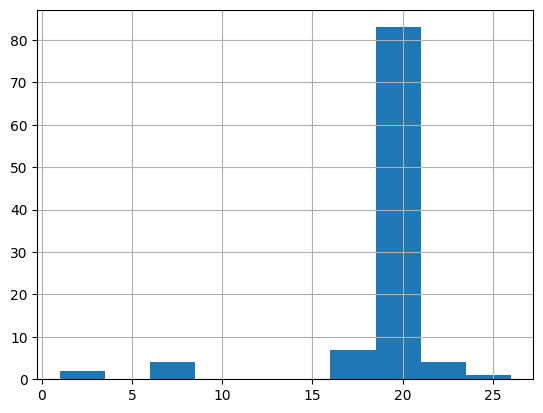

In [ ]:
queries.hist()

In [ ]:
# Calculate the number of words in the biography, query, and response
df['biography_length'] = df['Biography'].apply(lambda x: len(x.split()))
df['query_length'] = df['Query'].apply(lambda x: len(x.split()))
df['response_length'] = df['Response'].apply(lambda x: len(x.split()))

df.head()

,Name,Biography,Query,Response,Emotion,biography_length,query_length,response_length
0,Bikram,Bikram is a rough and tough smuggler from the ...,What is your opinion on friendship?,Friendship is a bond stronger than blood.,Loyalty,13,6,7
1,Arcturus the Bounty Hunter,Arcturus is a fearless bounty hunter who has m...,What made you become a bounty hunter?,I believe in justice and making the world a sa...,Purpose,81,7,11
2,Elena Gilbert,Elena Gilbert is a teenage girl from the town ...,Can you tell me about Elena's role in Mystic F...,Elena is often caught in the middle.,Neutral,72,10,7
3,Arin the Cleric,Arin is a devoted follower of the god of light...,Have you ever faced a great challenge in your ...,"Yes, I've faced trials that tested my beliefs.",Determination,52,10,8
4,Scott McCall,Scott McCall is a teenage werewolf and the mai...,Can you tell me about your transformation?,"""Bitten, changed, became werewolf.""",Acceptance,13,7,4


count    1915.000000
mean       49.636554
std        22.657449
min         8.000000
25%        36.000000
50%        55.000000
75%        68.000000
max       100.000000
Name: biography_length, dtype: float64


<Axes: >

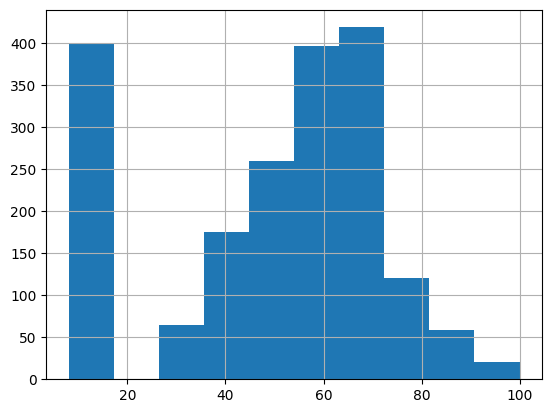

In [ ]:
# Summarize biography length
print(df['biography_length'].describe())
df['biography_length'].hist()

count    1915.000000
mean        7.575457
std         3.279703
min         3.000000
25%         6.000000
50%         7.000000
75%         9.000000
max        48.000000
Name: query_length, dtype: float64


<Axes: >

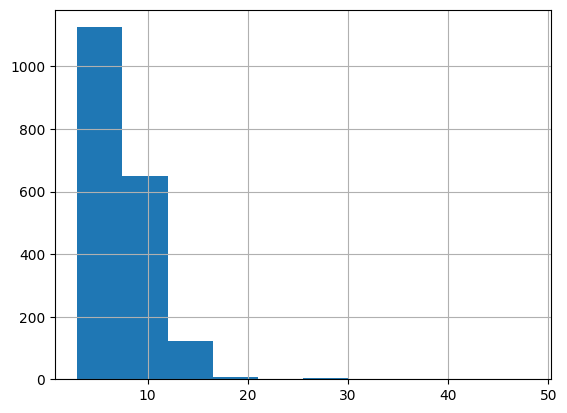

In [ ]:
# Summarize query length
print(df['query_length'].describe())
df['query_length'].hist()

count    1915.000000
mean       12.744125
std        10.909302
min         1.000000
25%         6.000000
50%         9.000000
75%        15.000000
max        71.000000
Name: response_length, dtype: float64


<Axes: >

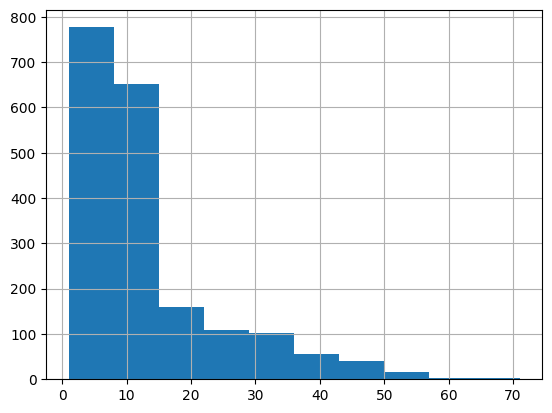

In [ ]:
# Summarize response length
print(df['response_length'].describe())
df['response_length'].hist()

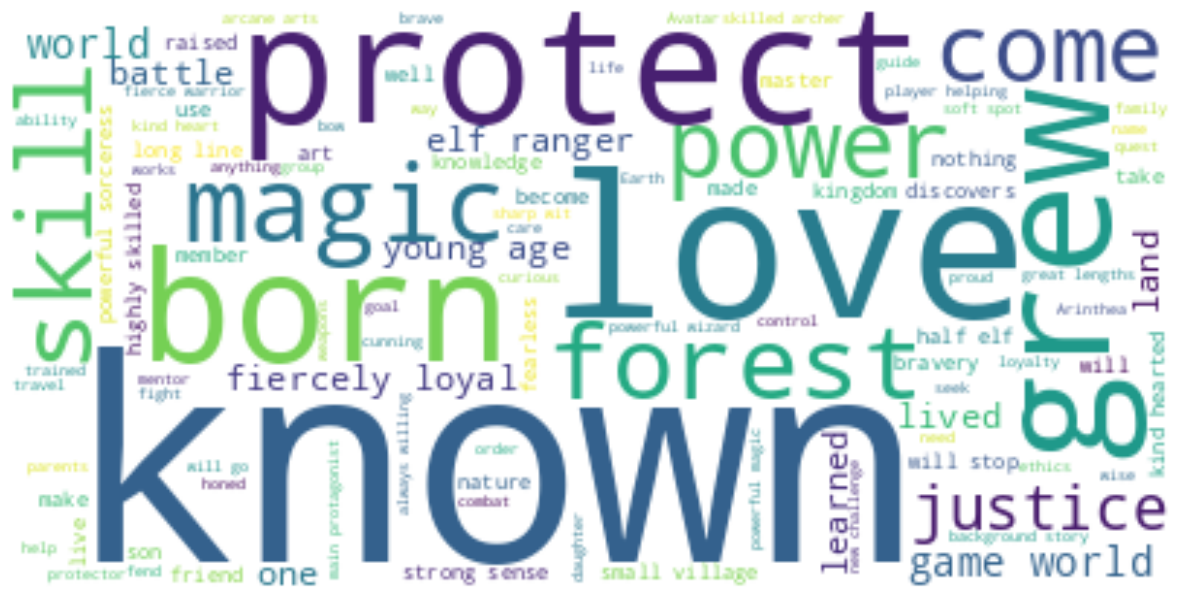

In [ ]:
# Generate biography wordcloud
## Add to presentation
biography = ' '.join(i for i in df['Biography'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(biography)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

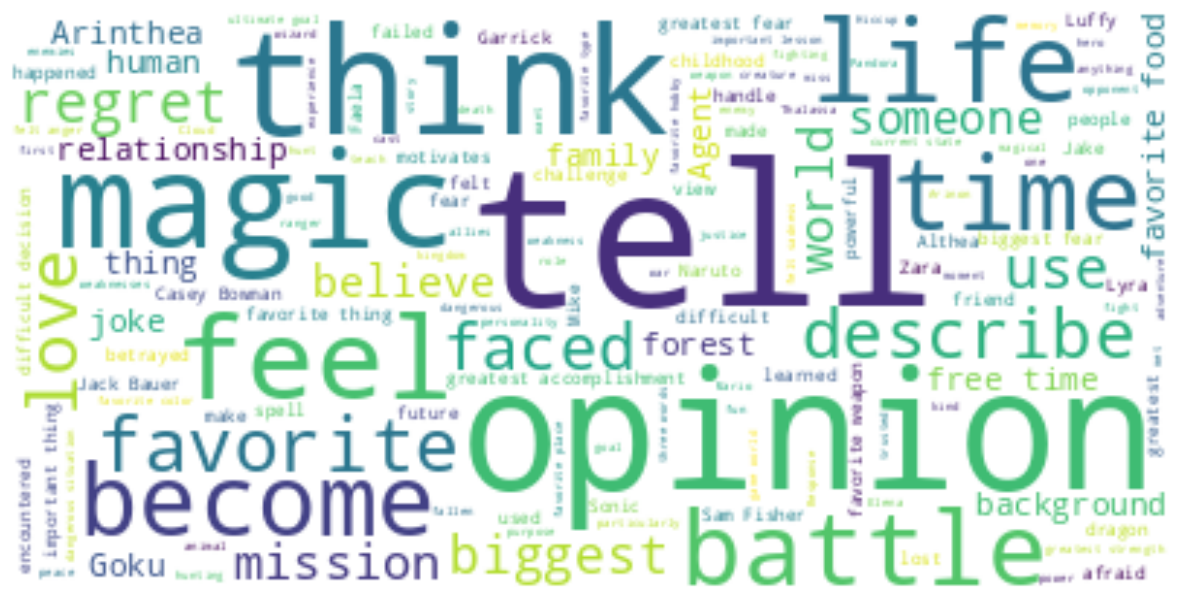

In [ ]:
# Generate query word cloud
## Add to presentation
query = ' '.join(i for i in df['Query'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(query)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

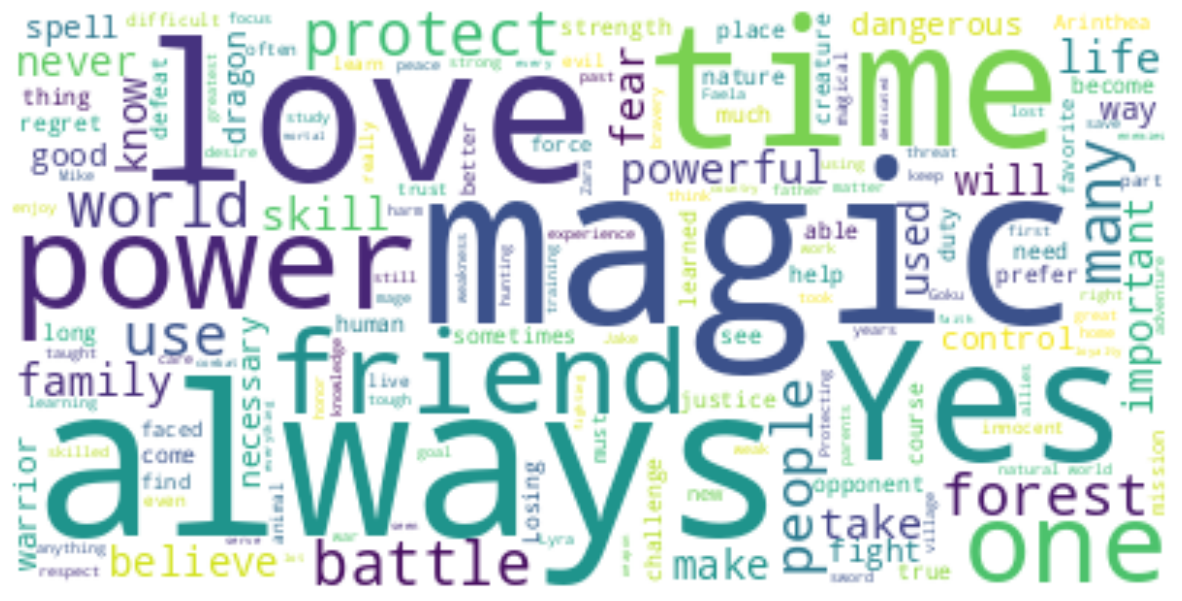

In [ ]:
# Generate response word cloud
## Add to presentation
response = ' '.join(i for i in df['Response'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(response)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()